In [1]:
from data_analysis import loadDataCC, loadDataRng

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

import pandas as pd

import numpy as np

from scipy import stats

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams.update({"font.size": 20})

In [3]:
rb = loadDataRng()  # randomly generated k=5 rules
cc = loadDataCC()  # rules from the cell collective

rb = rb[rb["version"] == "new"].merge(
    rb[rb["version"] == "v0.1.2"],
    on="Unnamed: 0",
    suffixes=("_v1.0.0", "_v0.1.2"),
)
cc = cc[cc["version"] == "new"].merge(
    cc[cc["version"] == "v0.1.2"],
    on="Unnamed: 0",
    suffixes=("_v1.0.0", "_v0.1.2"),
)

sv = pd.read_csv("nontrivial_cc_rules_with_shuffle_vals.csv")
sv["ks_shuffle_vals"] = sv["ks_shuffle_vals"].map(
    lambda x: eval(x.replace("nan", "np.nan"))
)


kval=3:
       unshuffled (12x duplicates)     shuffled
count                  4968.000000  4968.000000
mean                      0.484803     0.405126
std                       0.293001     0.242021
min                       0.000000     0.000000
25%                       0.250000     0.250000
50%                       0.375000     0.375000
75%                       0.875000     0.416667
max                       1.000000     1.000000

kval=4:
       unshuffled (12x duplicates)     shuffled
count                  3240.000000  3240.000000
mean                      0.463050     0.389779
std                       0.271883     0.188830
min                       0.000000     0.000000
25%                       0.328125     0.255208
50%                       0.421875     0.428255
75%                       0.562500     0.492188
max                       0.937500     0.937500

kval=5:
       unshuffled (12x duplicates)     shuffled
count                  2052.000000  2052.000000
mean         

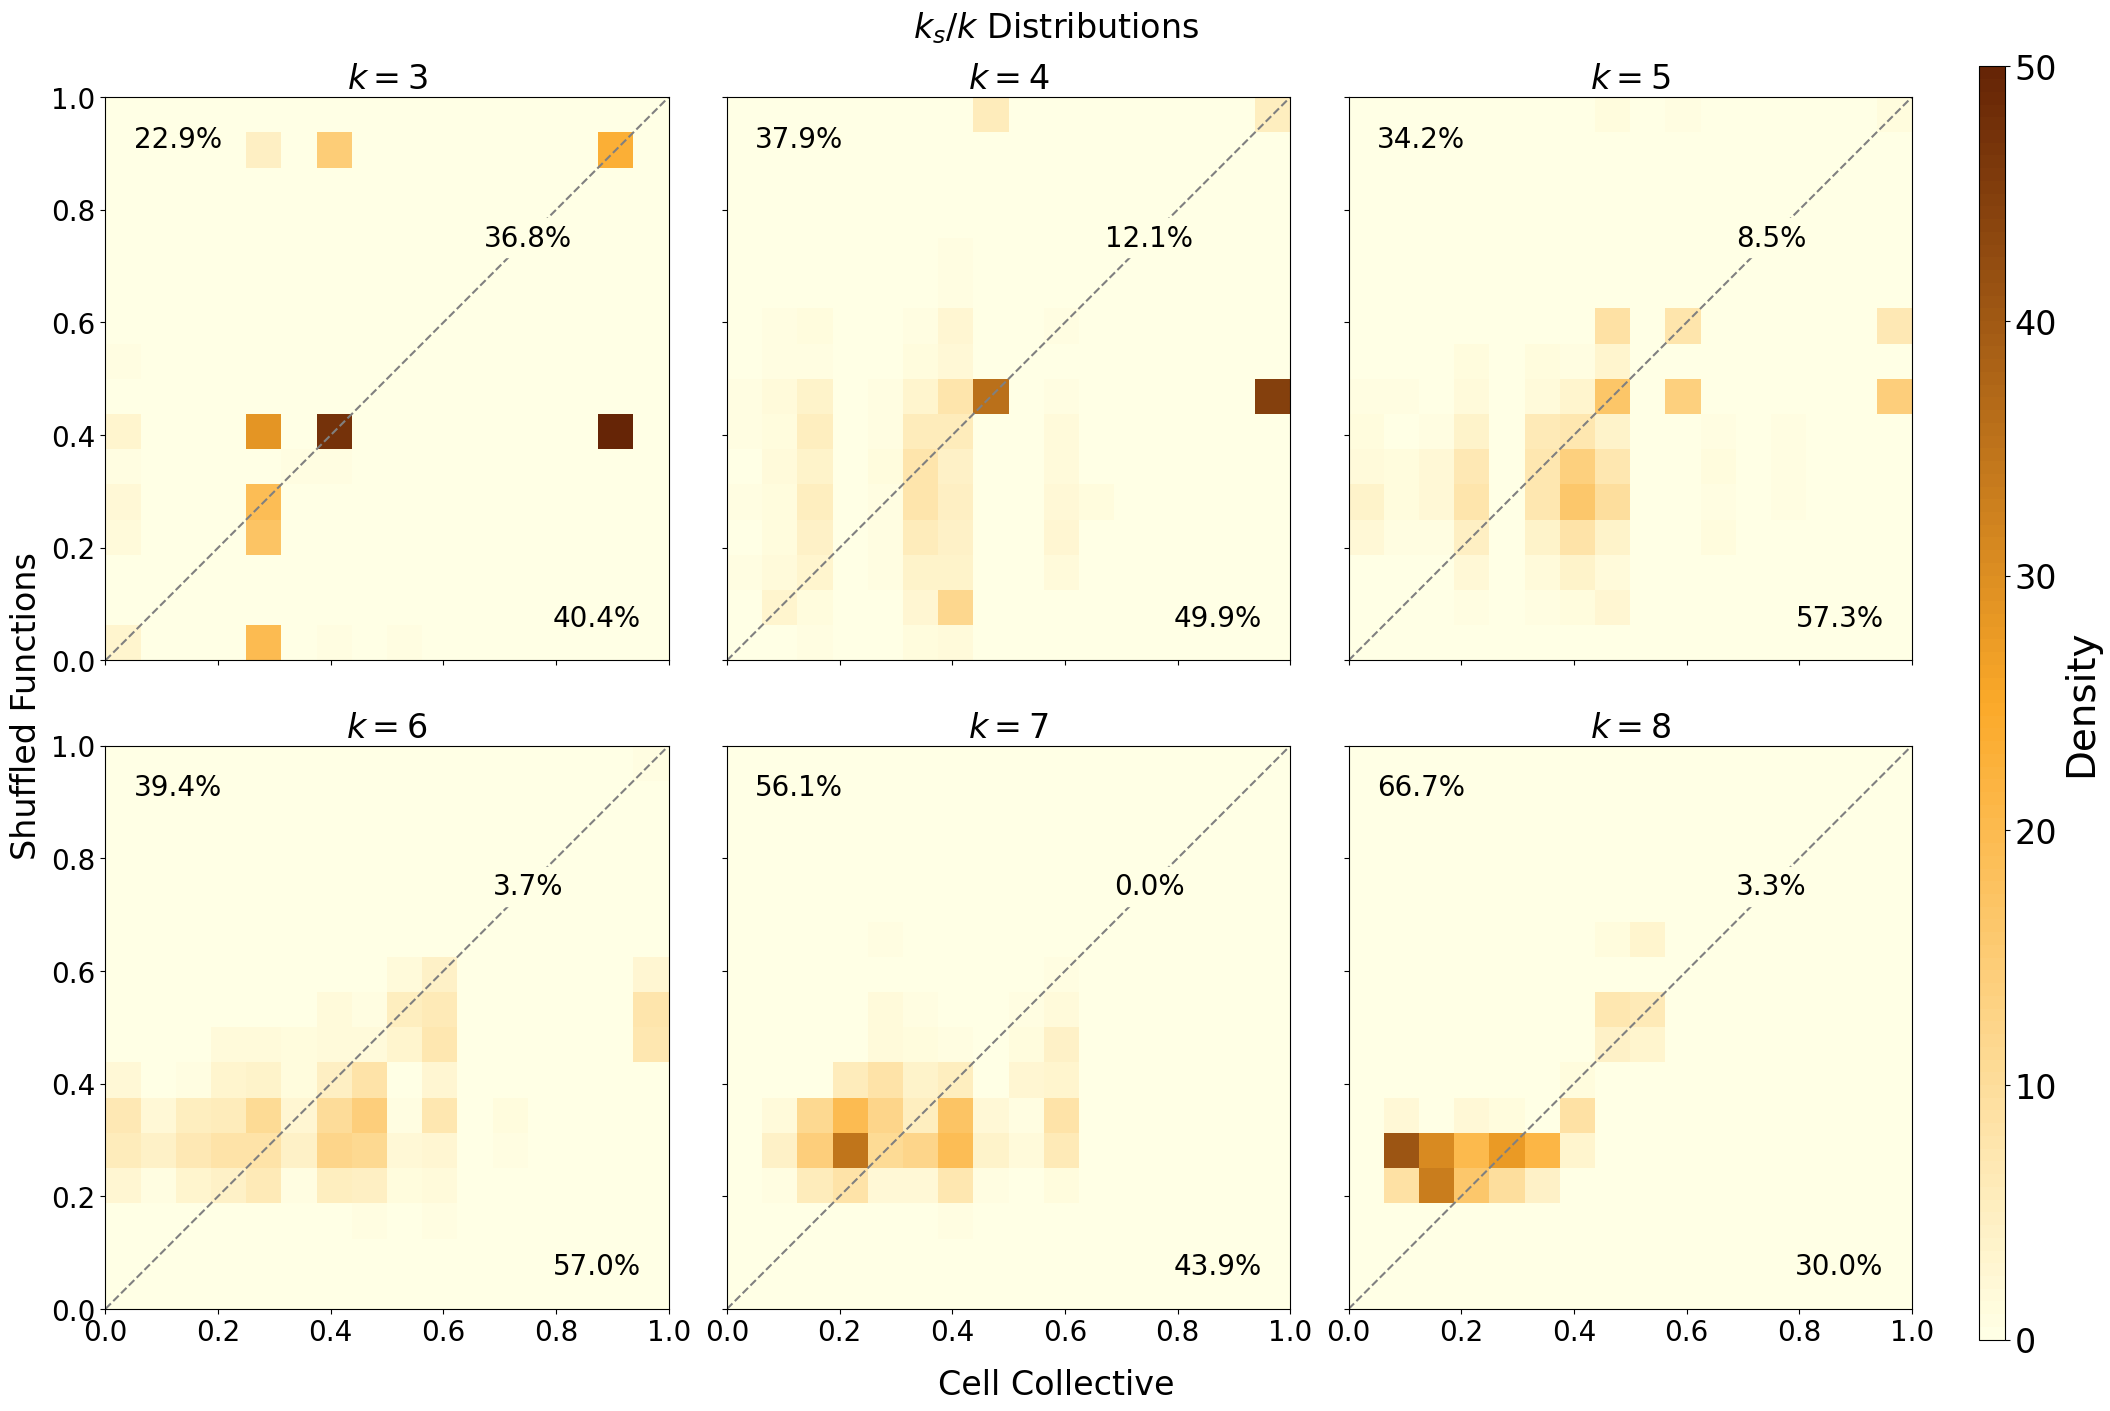

In [60]:
all_ks = []
kvals = [3, 4, 5, 6, 7, 8]


fig, axs = plt.subplots(
    2, 3, figsize=(7 * 3, 7 * 2), sharex="col", sharey="row", layout="constrained"
)


fig.set_facecolor("white")


cmap = LinearSegmentedColormap.from_list(
    "my_color_list",
    [
        "#ffffe5",
        "#fba929",
        "#662506",
    ],
    N=100,
)



for kval, ax in zip(kvals, axs.flatten()):
    unshuffled_ks = []
    shuffled_ks = []

    for i, row in sv.iterrows():
        if row["k_v1.0.0"] != kval:
            continue
        vals = [x / kval for x in row["ks_shuffle_vals"] if x > -1]
        rval = row["ks_v1.0.0"]
        if rval > -1 and len(vals) > 11:
            unshuffled_ks += [rval / kval] * len(vals)
            shuffled_ks += vals

    sym_up_frac = sum(u < s for u, s in zip(unshuffled_ks, shuffled_ks)) / len(
        unshuffled_ks

    )

    sym_down_frac = sum(u > s for u, s in zip(unshuffled_ks, shuffled_ks)) / len(
        unshuffled_ks
    )


    sym_same_frac = sum(u == s for u, s in zip(unshuffled_ks, shuffled_ks)) / len(
        unshuffled_ks
    )


    for u, s in zip(unshuffled_ks, shuffled_ks):
        if u > s or u < s or u == s:


            continue
        else:
            print(f"{u=}{s=}")

    print(f"\n{kval=}:")
    print(
        pd.DataFrame(
            zip(unshuffled_ks, shuffled_ks),
            columns=["unshuffled (12x duplicates)", "shuffled"],
        ).describe()
    )
    all_ks += list(zip(unshuffled_ks, shuffled_ks))

    binwidth = 1 / 16

    h = ax.hist2d(
        unshuffled_ks,
        shuffled_ks,

        bins=[binwidth * i for i in range(int(1 / binwidth) + 1)],
        cmap=cmap,
        density=True,
        vmin=0,
        vmax=50,
    )


    ax.plot([0, 1], [0, 1], color="grey", linestyle="--")
    ax.annotate(

        f"{(sym_up_frac)*100:.1f}%",
        xy=(0.05, 0.95),
        xycoords="axes fraction",
        horizontalalignment="left",
        verticalalignment="top",
    )


    ax.annotate(
        f"{(sym_down_frac)*100:.1f}%",
        xy=(0.95, 0.05),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="bottom",
    )

    ax.annotate(

        f"{sym_same_frac*100:.1f}%",
        xy=(0.75, 0.75),
        xycoords="axes fraction",
        horizontalalignment="center",
        verticalalignment="center",
        backgroundcolor="#ffffe5",
    )

    ax.set_aspect("equal")

    ax.set_title(f"$k={kval}$")

    # ax.set_xlabel("Cell Collective")

    # ax.set_ylabel("shuffled outputs")

print("All ks combined:")
print(
    pd.DataFrame(
        all_ks,
        columns=["unshuffled (12x duplicates)", "shuffled"],
    ).describe()
)

fig.supxlabel("Cell Collective")
fig.supylabel("Shuffled Functions")
fig.suptitle("$k_s/k$ Distributions")


cbar = fig.colorbar(h[3], ax=axs, location="right", aspect=50, pad=0.025)
cbar.ax.tick_params(axis="both", labelsize=24)
cbar.set_label("Density", fontsize=28)



fig.savefig("figs/k_s_2dhist_shuffled.pdf", bbox_inches="tight")
fig.savefig("figs/k_s_2dhist_shuffled.png", bbox_inches="tight")

In [69]:
cc[(cc["k_v1.0.0"] >= 3) & (cc["k_v1.0.0"] <= 8)]["ks_norm_v1.0.0"].describe()

count    1024.000000
mean        0.449983
std         0.267207
min         0.000000
25%         0.250000
50%         0.375000
75%         0.562500
max         1.000000
Name: ks_norm_v1.0.0, dtype: float64

In [70]:
df_ak = pd.DataFrame(
    all_ks,
    columns=["unshuffled (12x duplicates)", "shuffled"],
)

stats.kstest(
    cc[(cc["k_v1.0.0"] >= 3) & (cc["k_v1.0.0"] <= 8)]["ks_norm_v1.0.0"],
    df_ak["shuffled"],
)


KstestResult(statistic=0.15585138165903667, pvalue=1.281947517245818e-20, statistic_location=0.556640625, statistic_sign=-1)

/tmp/ipykernel_16684/2986102478.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


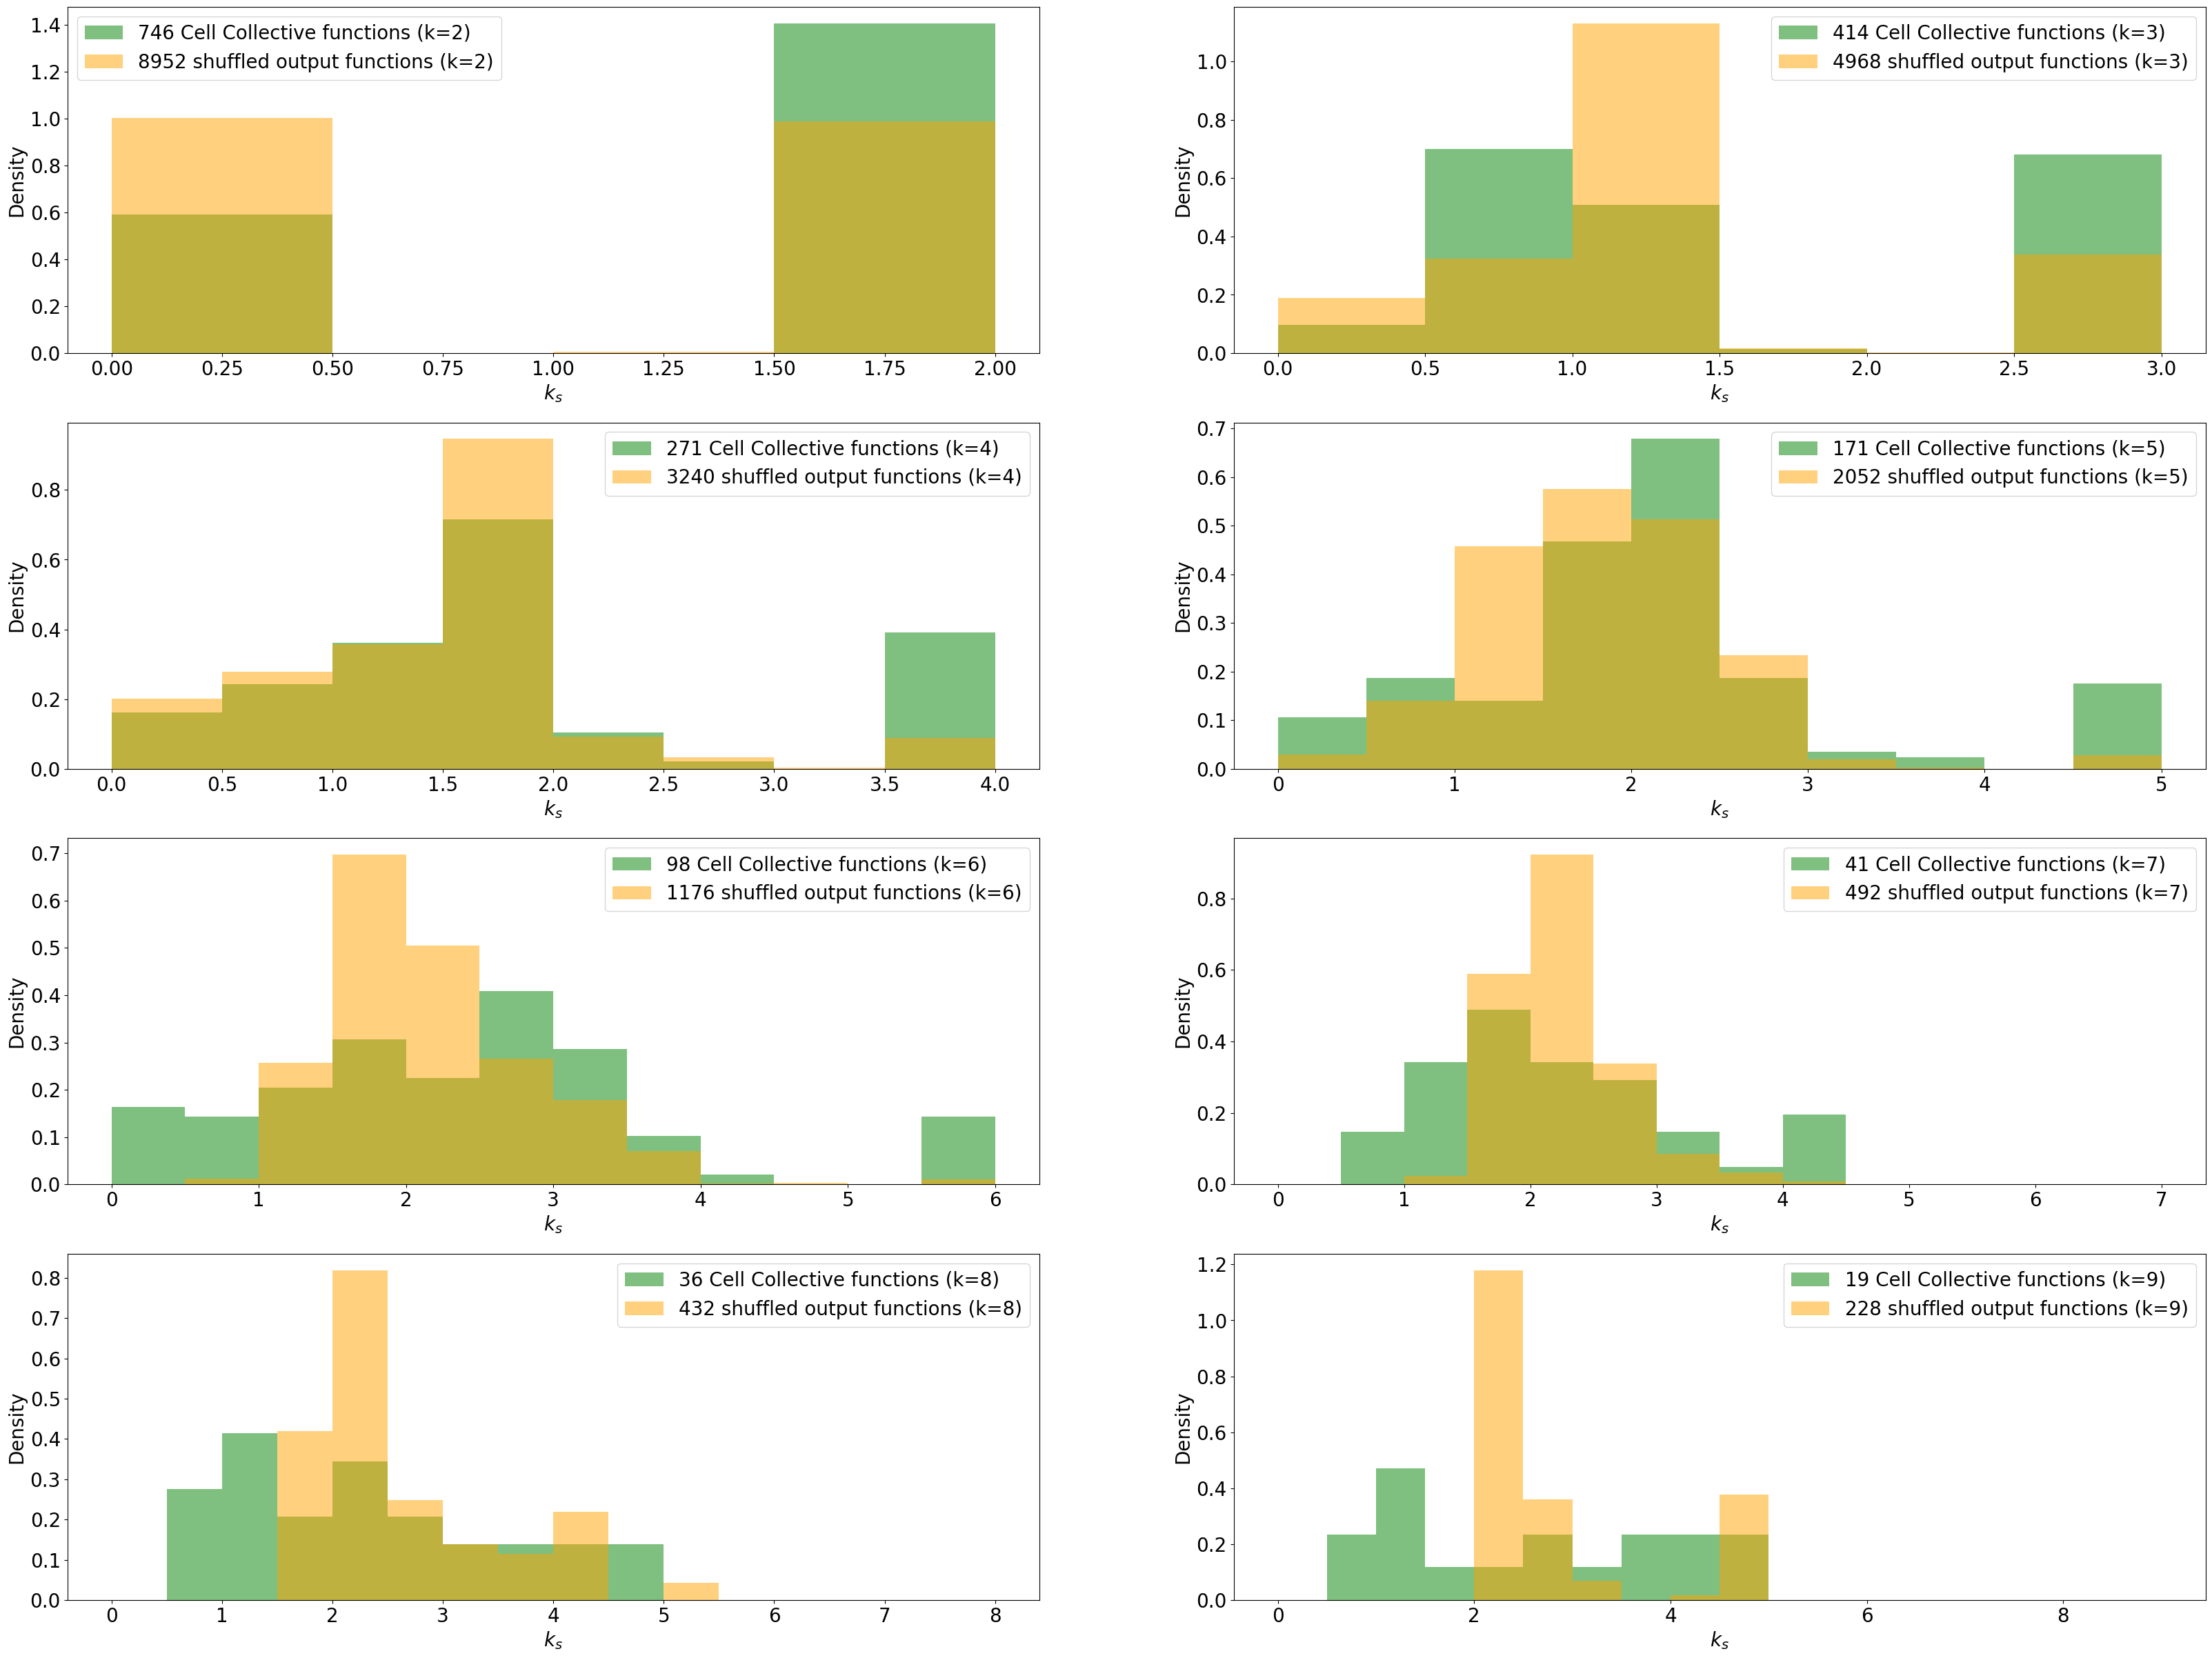

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(40, 30))
k = 1
for ax in axs.flatten():
    k += 1
    fig.set_facecolor("white")
    width = 0.5
    bins = np.arange(0, k + width, width)
    ax.hist(
        cc[cc["k_v1.0.0"] == k]["ks_v1.0.0"],
        color="green",
        alpha=0.5,
        density=True,
        label=f'{len(cc[cc["k_v1.0.0"] == k]["ks_v1.0.0"])} Cell Collective functions ({k=})',
        bins=bins,
    )
    shuffled_vals = np.array(
        [row["ks_shuffle_vals"] for _, row in sv.iterrows() if row["k_v1.0.0"] == k]
    ).flatten()
    ax.hist(
        shuffled_vals,
        color="orange",
        alpha=0.5,
        density=True,
        label=f"{len(shuffled_vals)} shuffled output functions ({k=})",
        bins=bins,
    )
    ax.set_xlabel("$k_s$")
    ax.set_ylabel("Density")
    # ax.set_title(f"{k=}")
    ax.legend()
    fig.show()

/tmp/ipykernel_24767/2678855103.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


171
993


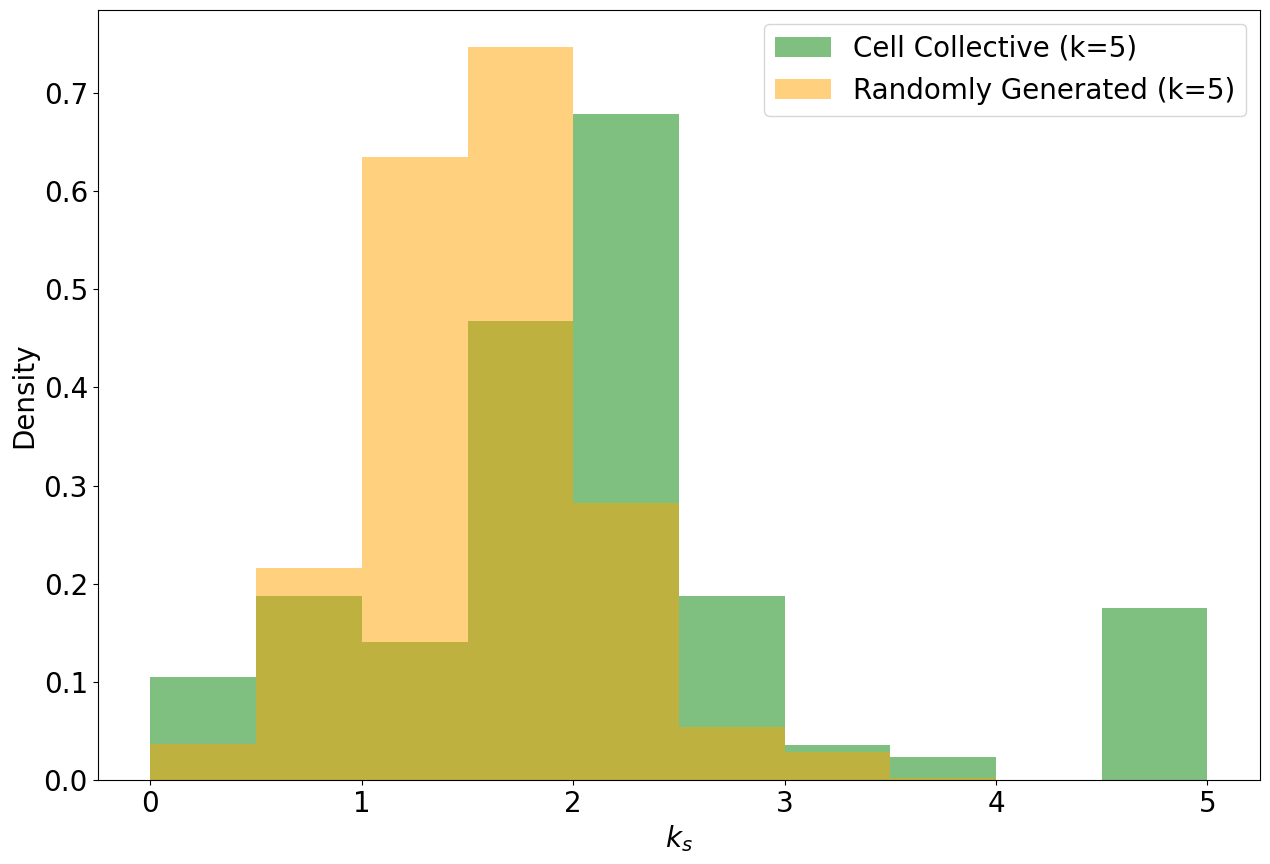

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig.set_facecolor("white")
bins = [0.5 * i for i in range(11)]
ax.hist(
    cc[cc["k_v1.0.0"] == 5]["ks_v1.0.0"],
    color="green",
    alpha=0.5,
    density=True,
    label="Cell Collective (k=5)",
    bins=bins,
)
ax.hist(
    rb[rb["k_v1.0.0"] == 5]["ks_v1.0.0"],
    color="orange",
    alpha=0.5,
    density=True,
    label="Randomly Generated (k=5)",
    bins=bins,
)
ax.set_xlabel("$k_s$")
ax.set_ylabel("Density")
ax.legend()
fig.show()
print(len(cc[cc["k_v1.0.0"] == 5]["ks_v1.0.0"]))
print(len(rb[rb["k_v1.0.0"] == 5]["ks_v1.0.0"]))

/tmp/ipykernel_24767/3254437333.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


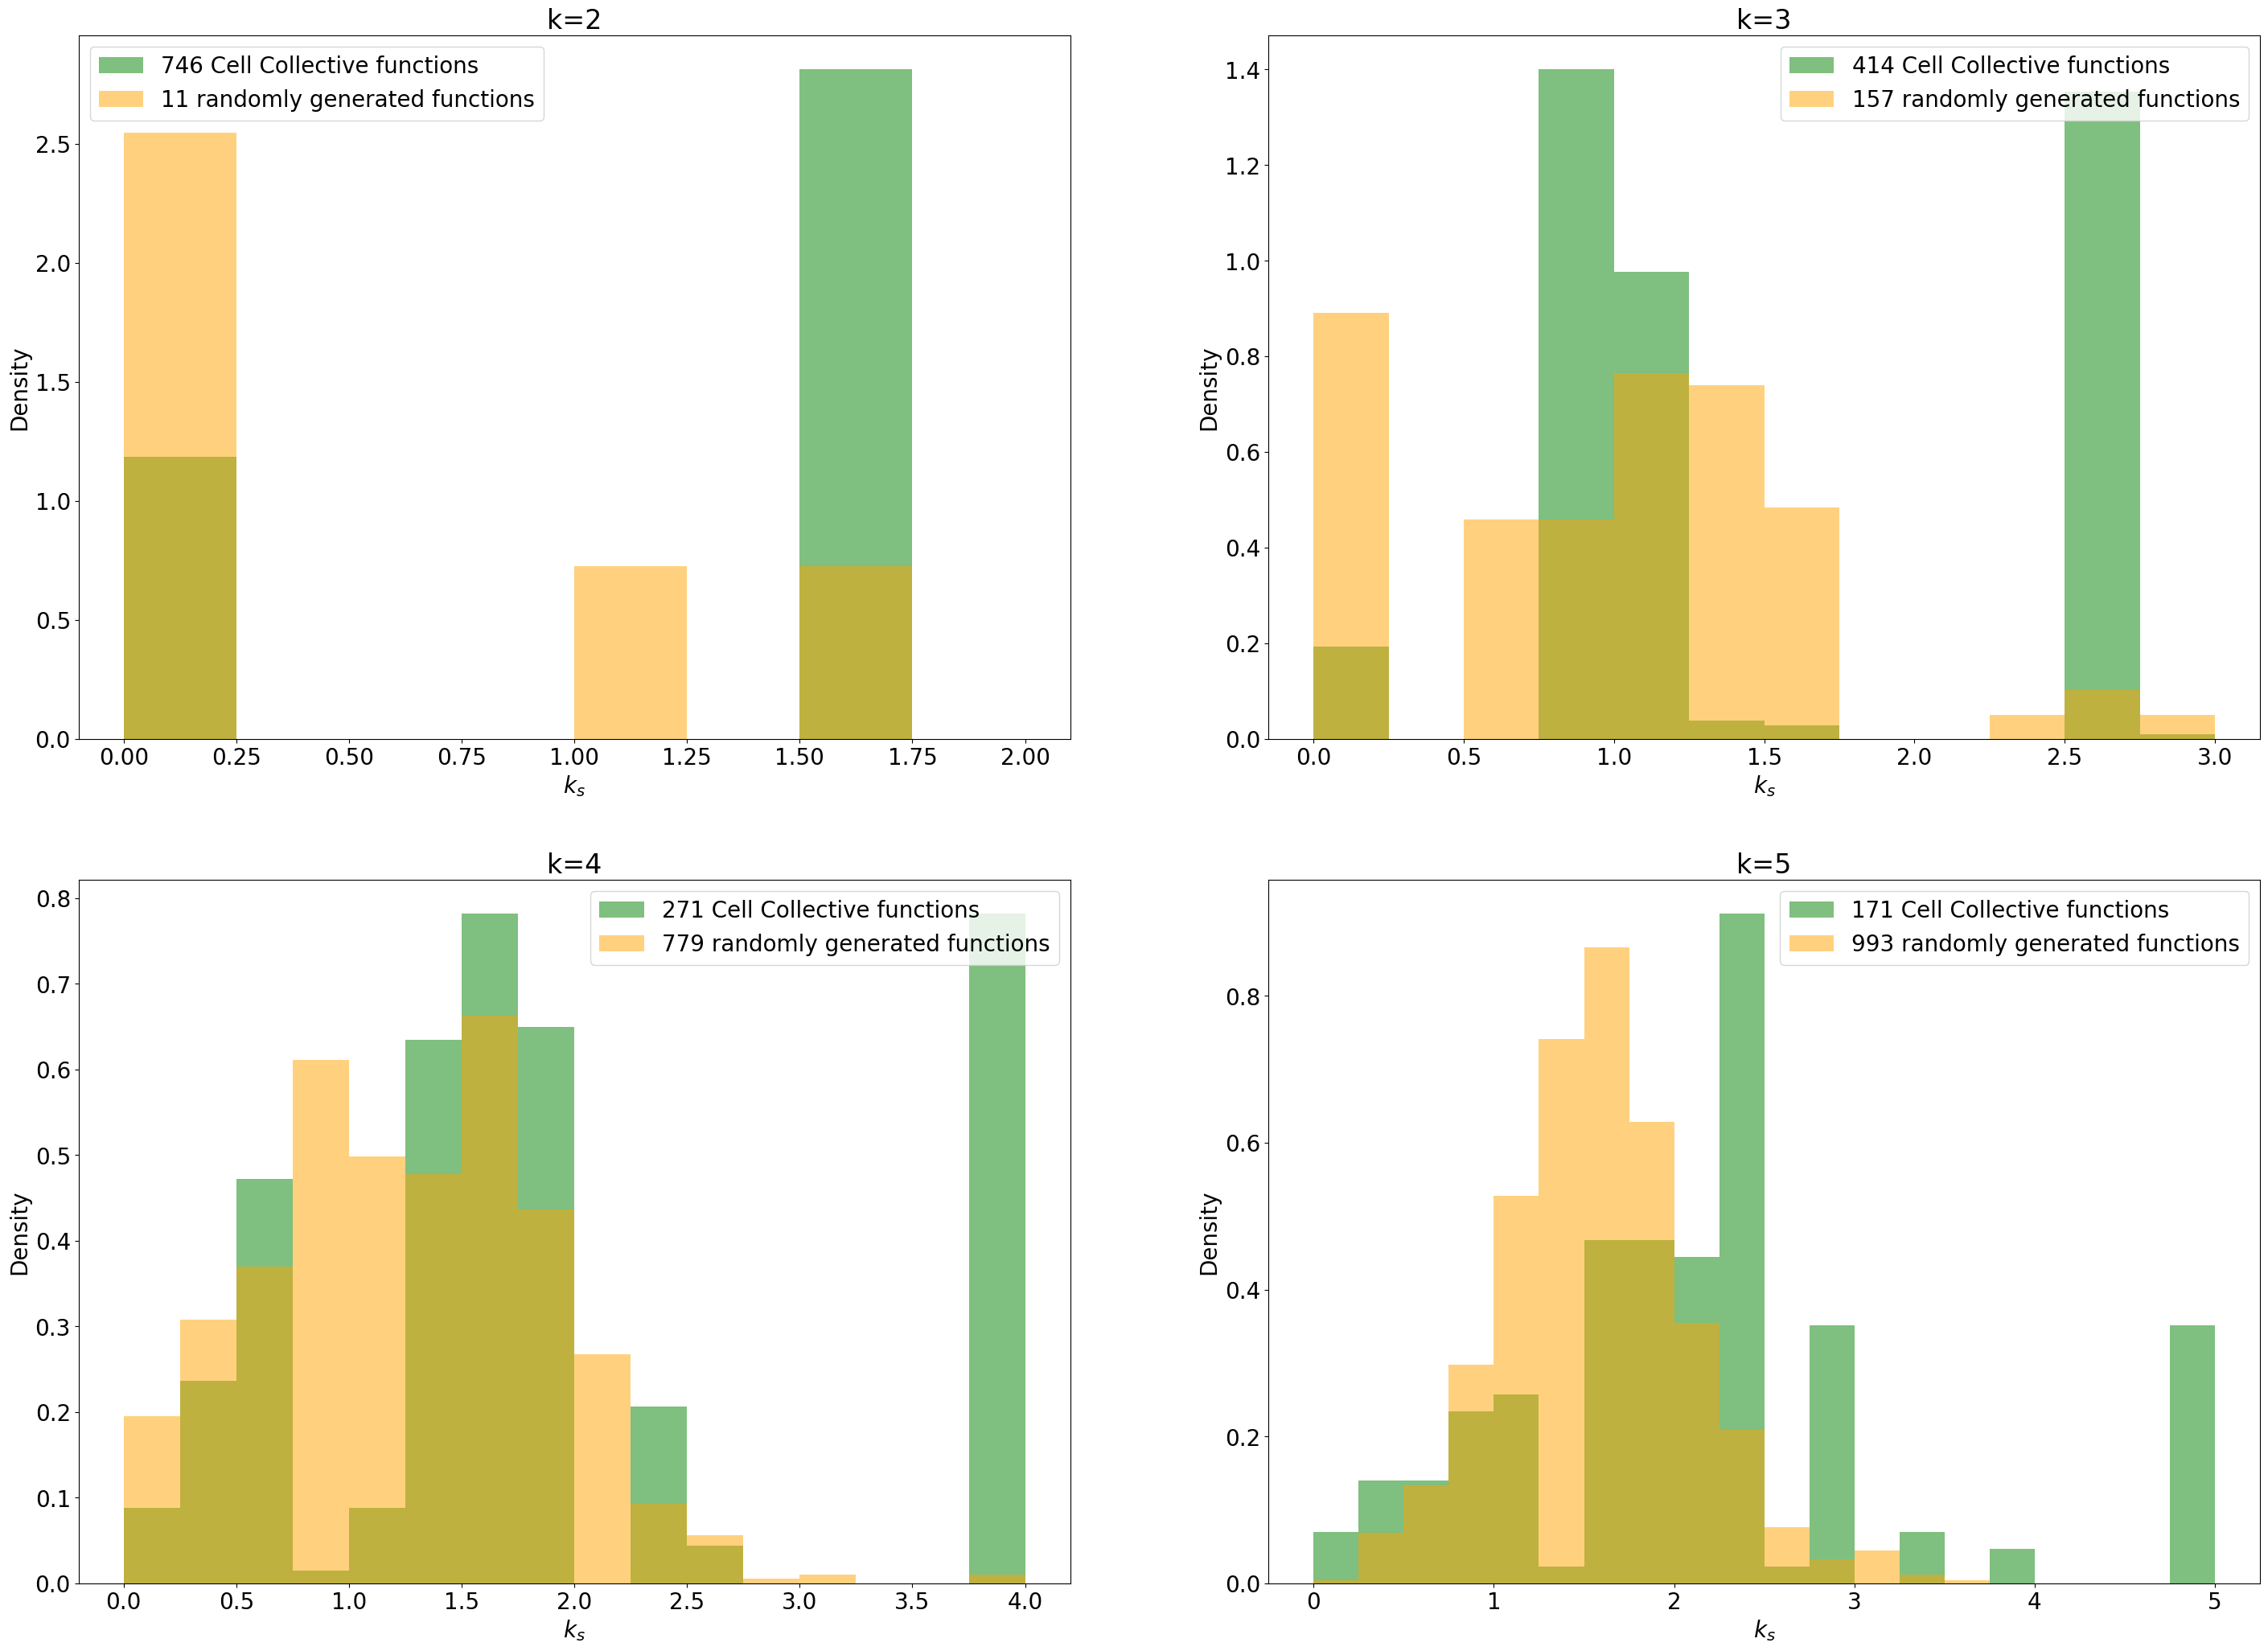

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(35, 25))
k = 1
for ax in axs.flatten():
    k += 1
    fig.set_facecolor("white")
    width = 0.25
    bins = np.arange(0, k + width, width)
    ax.hist(
        cc[cc["k_v1.0.0"] == k]["ks_v1.0.0"],
        color="green",
        alpha=0.5,
        density=True,
        label=f'{len(cc[cc["k_v1.0.0"] == k]["ks_v1.0.0"])} Cell Collective functions',
        bins=bins,
    )
    ax.hist(
        rb[rb["k_v1.0.0"] == k]["ks_v1.0.0"],
        color="orange",
        alpha=0.5,
        density=True,
        label=f'{len(rb[rb["k_v1.0.0"] == k]["ks_v1.0.0"])} randomly generated functions',
        bins=bins,
    )
    ax.set_xlabel("$k_s$")
    ax.set_ylabel("Density")
    ax.set_title(f"{k=}")
    ax.legend()
    fig.show()

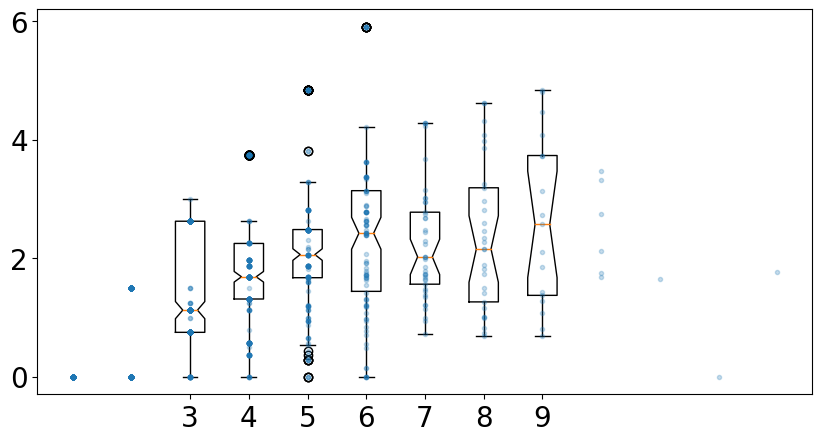

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(
    cc[cc["k_v1.0.0"] <= 999]["k_v1.0.0"],
    cc[cc["k_v1.0.0"] <= 999]["ks_v1.0.0"],
    ".",
    alpha=0.25,
)
ax.boxplot(
    [
        cc[(cc["k_v1.0.0"] == k) & ~np.isnan(cc["ks_v1.0.0"])]["ks_v1.0.0"]
        for k in range(3, 10)
    ],
    positions=[k for k in range(3, 10)],
    notch=True,
    zorder=0,
)
# ax.plot(
#     rb[rb["k_v1.0.0"] <= 999]["k_v1.0.0"],
#     rb[rb["k_v1.0.0"] <= 999]["ks_v1.0.0"],
#     ".",
#     alpha=0.25,
# )
# ax.boxplot(
#     [
#         rb[(rb["k_v1.0.0"] == k) & ~np.isnan(rb["ks_v1.0.0"])]["ks_v1.0.0"]
#         for k in range(3, 10)
#     ],
#     positions=[k for k in range(3, 10)],
#     notch=True,
#     zorder=0,
# )

plt.show()

In [40]:
def plot_time_comp(df, annotation="", show_slow=True):
    # set up colors
    slow_color = "#9970AB"
    equal_color = "#000000"
    fast_color = "#5AAE61"
    blazing_color = "#1B7837"

    # set up figure and axes
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor("white")

    stretch_factor = 15

    axd = fig.subplot_mosaic(
        [
            ["new_timeout", "."],
            ["both_ran", "old_timeout"],
        ],
        gridspec_kw={
            "width_ratios": [stretch_factor, 1],
            "height_ratios": [1, stretch_factor],
        },
    )

    # gather data
    timeout = 10

    both_ran = ~df["timeout_v0.1.2"] & ~df["timeout_v1.0.0"]
    old_timeout = df["timeout_v0.1.2"] & ~df["timeout_v1.0.0"]
    new_timeout = ~df["timeout_v0.1.2"] & df["timeout_v1.0.0"]

    correctness_colors = np.array(
        ["blue" if x else "red" for x in df["correct_v0.1.2"]]
    )
    timeout_color = "purple"

    # plot time points on the proper axes
    axd["both_ran"].scatter(
        df[both_ran]["time_sym_v0.1.2"],
        df[both_ran]["time_sym_v1.0.0"],
        c=correctness_colors[both_ran],
        alpha=0.5,
    )

    axd["old_timeout"].scatter(
        np.array([timeout * 10] * old_timeout.sum()),
        df[old_timeout]["time_sym_v1.0.0"],
        c=timeout_color,
        alpha=0.5,
    )

    axd["new_timeout"].scatter(
        df[new_timeout]["time_sym_v0.1.2"],
        [timeout * 10] * new_timeout.sum(),
        c=correctness_colors[new_timeout],
        alpha=0.5,
    )

    # set up axis extensions (vertical extension first)
    axd["new_timeout"].set_yticks([timeout * 10])
    axd["new_timeout"].set_xticks([])
    axd["new_timeout"].set_yticklabels([""])
    axd["new_timeout"].spines.bottom.set_visible(False)
    axd["both_ran"].spines.top.set_visible(False)

    fig.subplots_adjust(hspace=0.05)

    axd["new_timeout"].xaxis.tick_top()
    axd["new_timeout"].tick_params(labeltop=False)
    axd["both_ran"].xaxis.tick_bottom()
    d = 0

    kwargs = dict(
        marker=[(-1, -d), (1, d)],
        markersize=12,
        linestyle="none",
        color="k",
        mec="k",
        mew=1,
        clip_on=False,
    )

    axd["new_timeout"].plot(
        [0, 1], [0, 0], transform=axd["new_timeout"].transAxes, **kwargs
    )

    axd["both_ran"].plot([0, 1], [1, 1], transform=axd["both_ran"].transAxes, **kwargs)

    # now set up horizontal axis extension
    axd["old_timeout"].set_xticks([timeout * 10])
    axd["old_timeout"].set_yticks([])
    axd["old_timeout"].set_xticklabels([""])

    axd["old_timeout"].spines.left.set_visible(False)
    axd["both_ran"].spines.right.set_visible(False)

    fig.subplots_adjust(wspace=0.05)

    axd["old_timeout"].yaxis.tick_right()
    axd["old_timeout"].tick_params(labelright=False)
    axd["both_ran"].yaxis.tick_left()
    d = 0

    kwargs = dict(
        marker=[(-d, -1), (d, 1)],
        markersize=12,
        linestyle="none",
        color="k",
        mec="k",
        mew=1,
        clip_on=False,
    )

    axd["old_timeout"].plot(
        [0, 0], [0, 1], transform=axd["old_timeout"].transAxes, **kwargs
    )

    axd["both_ran"].plot([1, 1], [1, 0], transform=axd["both_ran"].transAxes, **kwargs)

    # plot speedup lines
    marker = "$\searrow$"
    speedup_x = np.logspace(-4, 1, 100)

    if show_slow:
        axd["both_ran"].plot(
            speedup_x, speedup_x * 10, linestyle="", marker=marker, color=slow_color
        )
    axd["both_ran"].plot(
        speedup_x, speedup_x, linestyle="", marker=marker, color=equal_color
    )
    axd["both_ran"].plot(
        speedup_x, speedup_x * 0.1, linestyle="", marker=marker, color=fast_color
    )
    axd["both_ran"].plot(
        speedup_x, speedup_x * 0.01, linestyle="", marker=marker, color=blazing_color
    )

    # plot timeout lines
    axd["both_ran"].axhline(timeout, linestyle="--", color="red", label="timeout")
    axd["both_ran"].axvline(timeout, linestyle="--", color="red", label=None)

    # set up axis labels and limits
    axd["both_ran"].set_xlabel("time (s) CANA v0.1.2")
    axd["both_ran"].set_ylabel("time (s) CANA v1.0.0 with schematodes")
    axd["both_ran"].set_xscale("log")
    axd["both_ran"].set_yscale("log")
    axd["both_ran"].set_xlim([1e-4, 1e1])
    axd["both_ran"].set_ylim([1e-4, 1e1])

    # calculate speedup percentages for speedup line labels
    speedup_fracs = [
        (
            100
            * sum(
                (
                    (df[both_ran]["time_sym_v1.0.0"] / df[both_ran]["time_sym_v0.1.2"])
                    < cutoff
                )
                | old_timeout
            )
            / (sum(both_ran | new_timeout | new_timeout))
        )
        for cutoff in [10, 1, 0.1, 0.01]
    ]

    # annotate speedup lines
    anchor_pt = 0.005
    fs = 20
    if show_slow:
        axd["both_ran"].annotate(
            f"better than 10x slower ({speedup_fracs[0]:.1f}%)",
            xy=(
                anchor_pt * np.log10(2 * np.sqrt(2)),
                anchor_pt * 10 * np.log10(2 * np.sqrt(2)),
            ),
            bbox={"color": "white", "alpha": 0.75},
            color=slow_color,
            ha="left",
            va="bottom",
            xycoords="data",
            textcoords="data",
            rotation=45,
            fontsize=fs,
        )
    axd["both_ran"].annotate(
        f"better than same speed ({speedup_fracs[1]:.1f}%)",
        xy=(anchor_pt, anchor_pt),
        bbox={"color": "white", "alpha": 0.75},
        color=equal_color,
        ha="left",
        va="bottom",
        xycoords="data",
        textcoords="data",
        rotation=45,
        fontsize=fs,
    )

    axd["both_ran"].annotate(
        f"better than 10x faster ({speedup_fracs[2]:.1f}%)",
        xy=(
            anchor_pt / np.log10(2 * np.sqrt(2)),
            anchor_pt * 0.1 / np.log10(2 * np.sqrt(2)),
        ),
        bbox={"color": "white", "alpha": 0.75},
        color=fast_color,
        ha="left",
        va="bottom",
        xycoords="data",
        textcoords="data",
        rotation=45,
        fontsize=fs,
    )

    axd["both_ran"].annotate(
        f"better than 100x faster ({speedup_fracs[3]:.1f}%)",
        xy=(
            anchor_pt / np.log10(2 * np.sqrt(2)) ** 2,
            anchor_pt * 0.01 / np.log10(2 * np.sqrt(2)) ** 2,
        ),
        bbox={"color": "white", "alpha": 0.75},
        color=blazing_color,
        ha="left",
        va="bottom",
        xycoords="data",
        textcoords="data",
        rotation=45,
        fontsize=fs,
    )

    # place legend
    axd["both_ran"].legend(
        [
            Line2D(
                [0],
                [0],
                linestyle="",
                marker="o",
                markersize=10,
                markerfacecolor="blue",
            ),
            Line2D(
                [0],
                [0],
                linestyle="",
                marker="o",
                markersize=10,
                markerfacecolor="red",
                color="red",
            ),
            Line2D(
                [0],
                [0],
                linestyle="",
                marker="o",
                markersize=10,
                markerfacecolor=timeout_color,
                color=timeout_color,
            ),
            Line2D([0], [0], linestyle="--", color="red", lw=2),
        ],
        [
            "Correct in v0.1.2",
            "Incorrect in v0.1.2",
            "Timeout in v0.1.2",
            f"Timeout (>{timeout}s)",
        ],
        fontsize=fs,
        loc="upper left",
    )

    # place title and return
    axd["new_timeout"].set_title(annotation)
    return fig

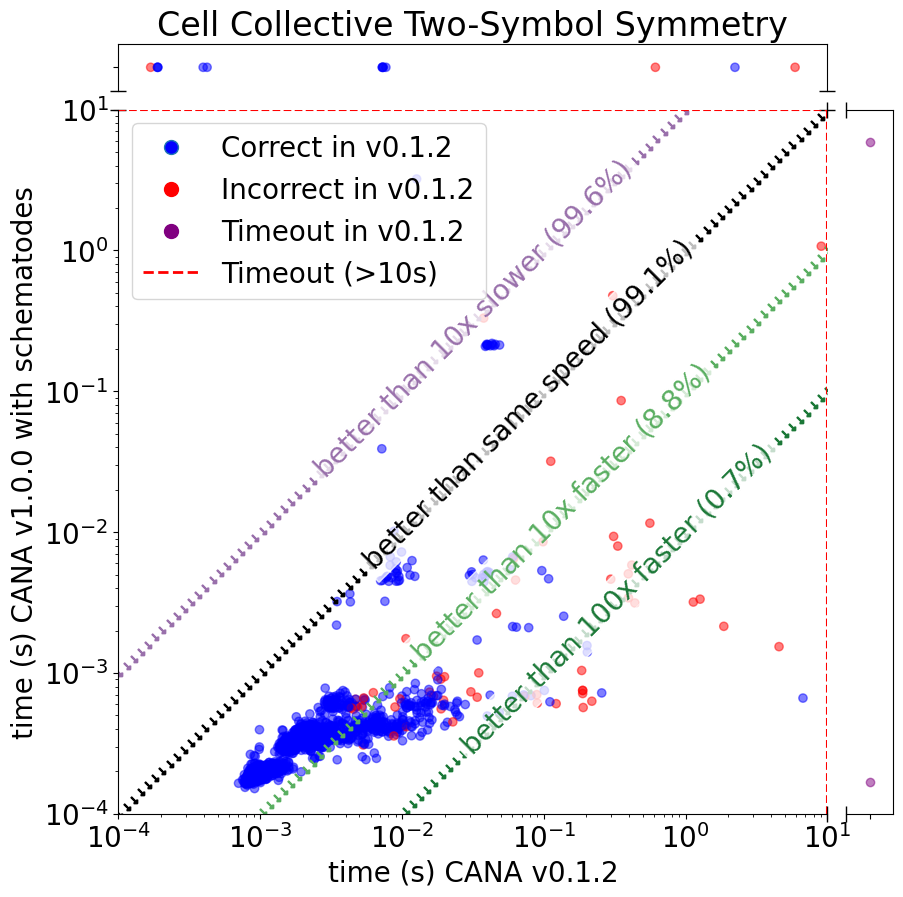

In [41]:
cc_comp_fig = plot_time_comp(cc, annotation="Cell Collective Two-Symbol Symmetry")
cc_comp_fig.savefig("figs/cc_comp.png", bbox_inches="tight")
cc_comp_fig.savefig("figs/cc_comp.pdf", bbox_inches="tight")

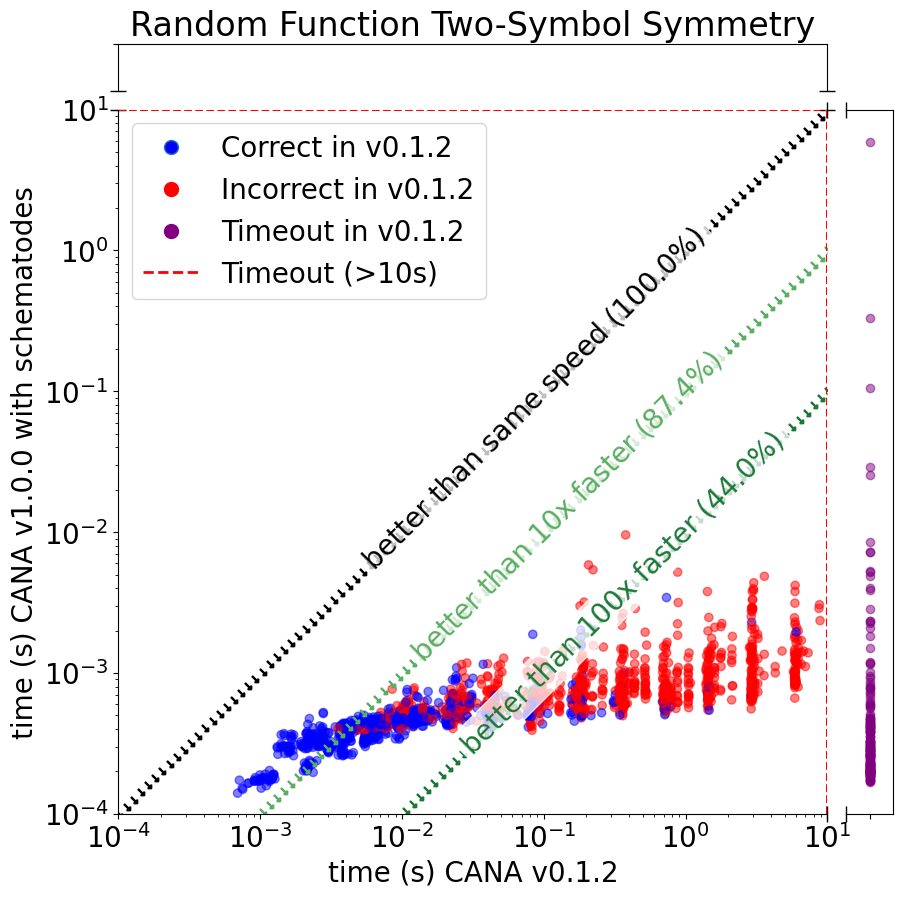

In [42]:
rb_comp_fig = plot_time_comp(
    rb, annotation="Random Function Two-Symbol Symmetry", show_slow=False
)


rb_comp_fig.savefig("figs/rb_comp.png", bbox_inches="tight")


rb_comp_fig.savefig("figs/rb_comp.pdf", bbox_inches="tight")


In [64]:
rb["bias_v1.0.0"].describe()

count    1943.000000
mean        0.313256
std         0.137527
min         0.000000
25%         0.187500
50%         0.281250
75%         0.375000
max         1.000000
Name: bias_v1.0.0, dtype: float64

In [65]:
rb["k_v1.0.0"].describe()

count    1943.000000
mean        4.414308
std         0.676013
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: k_v1.0.0, dtype: float64